In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from kid_readout import *

In [3]:
import glob

In [4]:
ncs = glob.glob('/artemis/detectors/2016-04-22_2*.nc')
ncs.sort()

In [5]:
import time

In [6]:
tic = time.time()
freq = []
s21 = []
for fn in ncs:
    print fn
    ncf = NCFile(fn)
    swa = ncf.SweepArray0
    for sa in swa.stream_arrays:
        freq.append(sa.frequency_MHz)
        s21.append(sa.s21_raw_mean)
    ncf.close()
    print (time.time()-tic)/60.
freq = np.array(freq)
s21 = np.array(s21)


/artemis/detectors/2016-04-22_205911_scan_lo_2010.0_MHz.nc
0.178549683094
/artemis/detectors/2016-04-22_210110_scan_lo_2200.0_MHz.nc
0.353798981508
/artemis/detectors/2016-04-22_210313_scan_lo_2390.0_MHz.nc
0.377951864401
/artemis/detectors/2016-04-22_210511_scan_lo_2580.0_MHz.nc
0.555769499143
/artemis/detectors/2016-04-22_210711_scan_lo_2770.0_MHz.nc
0.73240544796
/artemis/detectors/2016-04-22_210911_scan_lo_2960.0_MHz.nc
0.913079631329
/artemis/detectors/2016-04-22_211110_scan_lo_3150.0_MHz.nc
1.09225676457
/artemis/detectors/2016-04-22_211310_scan_lo_3340.0_MHz.nc
1.27081539631
/artemis/detectors/2016-04-22_211510_scan_lo_3530.0_MHz.nc
1.44491068125
/artemis/detectors/2016-04-22_211709_scan_lo_3720.0_MHz.nc
1.61925899982


In [8]:
s21.shape

(640, 256)

In [9]:
freq.shape

(640, 256)

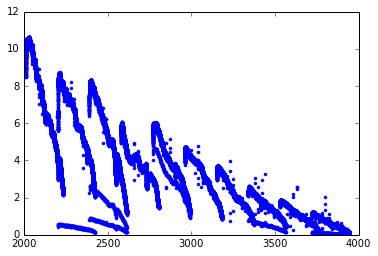

In [12]:
plot(freq.flatten(),np.abs(s21).flatten(),'.')

In [13]:
np.savez('/artemis/detectors/archive/2016-04-22-stanford-almn-cpw-scan.npz',freq=freq,s21=s21)

In [4]:
swa = ncf.SweepArray0

In [5]:
fr = swa.frequency_MHz_stack

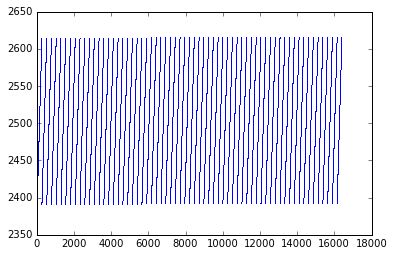

In [6]:
plot(fr,',')

In [7]:
len(swa.stream_arrays)

64

In [13]:
sa = swa.stream_arrays[0]

In [14]:
sa.frequency_MHz.shape

(32,)

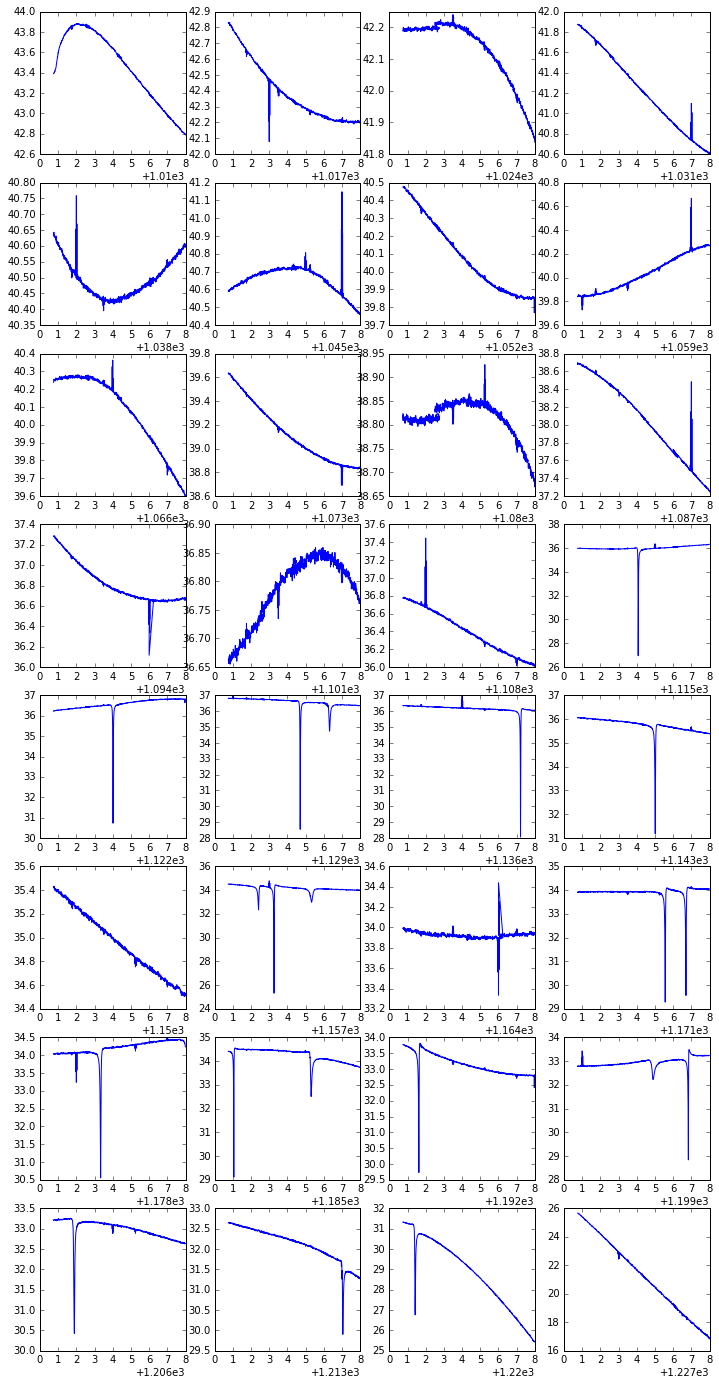

In [110]:
fig,axs = subplots(8,4,figsize=(12,24))
for k in range(32):
    ax = axs.flatten()[k]
    swp = swa.sweep(k)
    ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
    #ax.plot(swp.frequency_MHz_stack,(np.angle(swp.s21_points)))

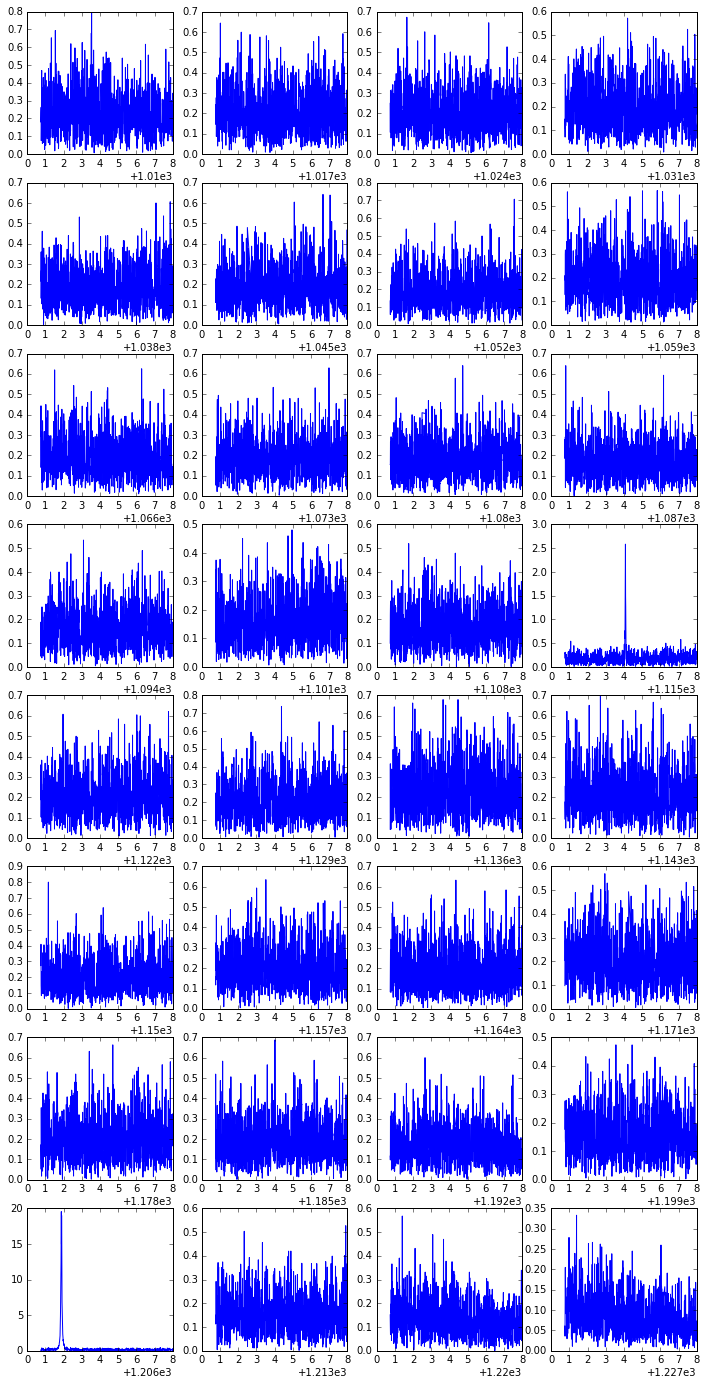

In [119]:
fig,axs = subplots(8,4,figsize=(12,24))
for k in range(32):
    ax = axs.flatten()[k]
    swp = swa.sweep(k)
    fold = swp.s21_raw_stack.reshape((1024,-1,256)).mean(1)
    resp = fold[:,32:96].mean(1) - fold[:,140:240].mean(1)
    mag_resp = np.abs(resp.real)+np.abs(resp.imag)
    ax.plot(swp.frequency_MHz_stack,mag_resp)
#    ax.plot(swp.frequency_MHz_stack,20*np.log10(np.abs(swp.s21_points)))
    #ax.plot(swp.frequency_MHz_stack,(np.angle(swp.s21_points)))

In [19]:
np.all(swp.frequency==swp.frequency_stack)


True

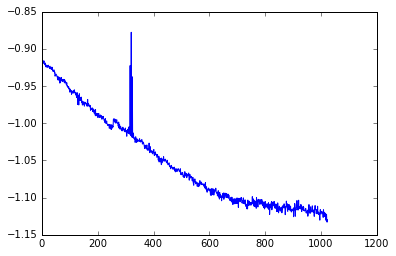

In [20]:
plot(np.angle(swp.s21_points))

In [8]:
swp = swa.sweep(27)

In [12]:
sa.s21_raw_mean.shape

(256,)

(2540, 2542)

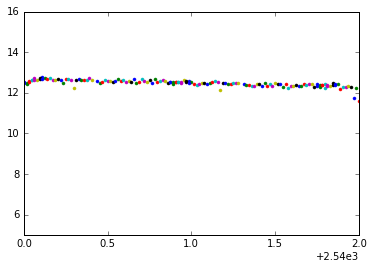

In [18]:
for sa in swa.stream_arrays:
    plot(sa.frequency_MHz,20*np.log10(np.abs(sa.s21_raw_mean)),'.')
ylim(5,16)
xlim(2540,2542)

In [19]:
swa.frequency_MHz_stack.shape

(16384,)

(2391, 2392)

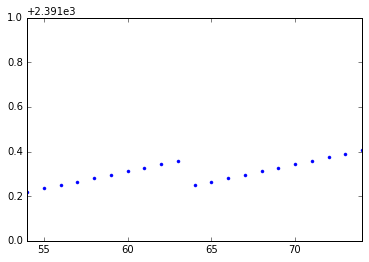

In [33]:
plot((swa.frequency_MHz_stack.reshape((-1,256)).T.flatten()),'.')
xlim(64-10,74)
ylim(2391,2392)

In [9]:
s21 = swp.s21_raw_stack

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [122]:
s21.shape

(1024, 32768)

In [123]:
fold = s21.reshape((1024,-1,256))

In [124]:
folded = fold.mean(1)

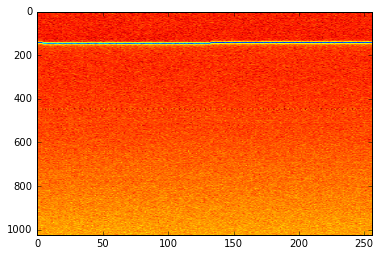

In [125]:
imshow(np.abs(folded),aspect='auto')

In [127]:
np.argmax(np.abs(folded[:,:100].mean(1) - folded[:,130:].mean(1)))

145

In [135]:
y = fold[145,...]

In [136]:
y.shape

(128, 256)

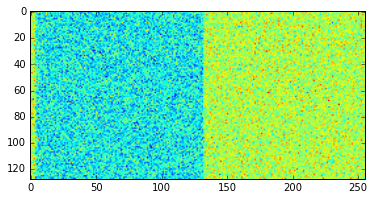

In [137]:
imshow(y.imag)

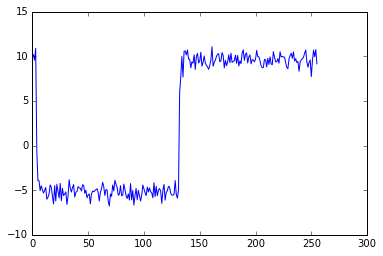

In [138]:
plot(y.imag.mean(0))

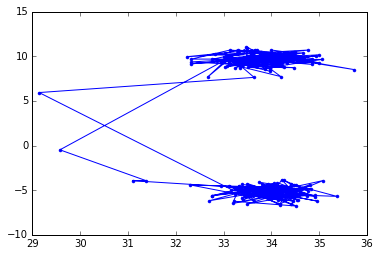

In [134]:
plot_ri(y,'.-')

<Container object of 3 artists>

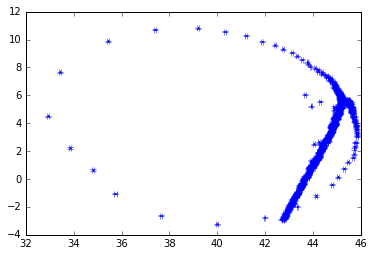

In [139]:
errorbar(swp.s21_points.real,swp.s21_points.imag,xerr=swp.s21_points_error.real,yerr=swp.s21_points_error.imag,linestyle='',marker=',')

In [141]:
swp.frequency_MHz_stack[:128].ptp()

0.9921875

In [142]:
swp.frequency_MHz_stack.shape

(1024,)

In [179]:
def validate_resonator(res):
    if res.Q_e_real < 1000:
        return False
    if res.Q_e_real > 1e6:
        return False
    if np.abs(res.Q_e_imag) > 1e6:
        return False
    if res.Q < 1000:
        return False
    if res.current_result.redchi > 1000:
        return False
    if np.abs(res.f_0 - res.frequency.min()) < res.frequency.ptp()*0.01:
        return False
    if np.abs(res.f_0 - res.frequency.max()) < res.frequency.ptp()*0.01:
        return False
    return True

In [171]:
swp = swa.sweep(21)

1010750000.0 2742.25825454 (1864.53705686+13434.0649872j) 2820.66058864 889.925379471 0.0 False
1011250000.0 2876.42785264 (201963.879328+44763.7483493j) 2916.01388692 136.814307391 0.0 False
1011750000.0 38053.9806759 (1.00009795663+27.3117893077j) -761.812471897 41420.6340091 0.0 False
1012250000.36 37031.569782 (6015893.77951+2139153.59964j) 37235.0470525 15.3403302253 0.362199068069 False
1013492187.5 102.168454563 (181.758284451-97.9343517888j) 181.033019947 3.25852040316 992187.5 False
1013000000.01 144.356901781 (1.00000000056-430.706710458j) 144.469322814 3.70246827295 0.0127862691879 False
1014492187.5 145.17266575 (482.90890792-618.677696519j) 163.817361226 3.79582394061 992187.5 False
1014000000.0 13349.2666899 (9999702.11115+0.0570389907807j) 13367.1113349 7.85402512989 4.76837158203e-07 False
1015242184.24 401.267445623 (16409.2709182-9839.34244641j) 408.617110152 2.94843034105 992184.23911 False
1015742187.5 767.192811118 (92908.9228924+0.00551135279238j) 773.580631369 3.

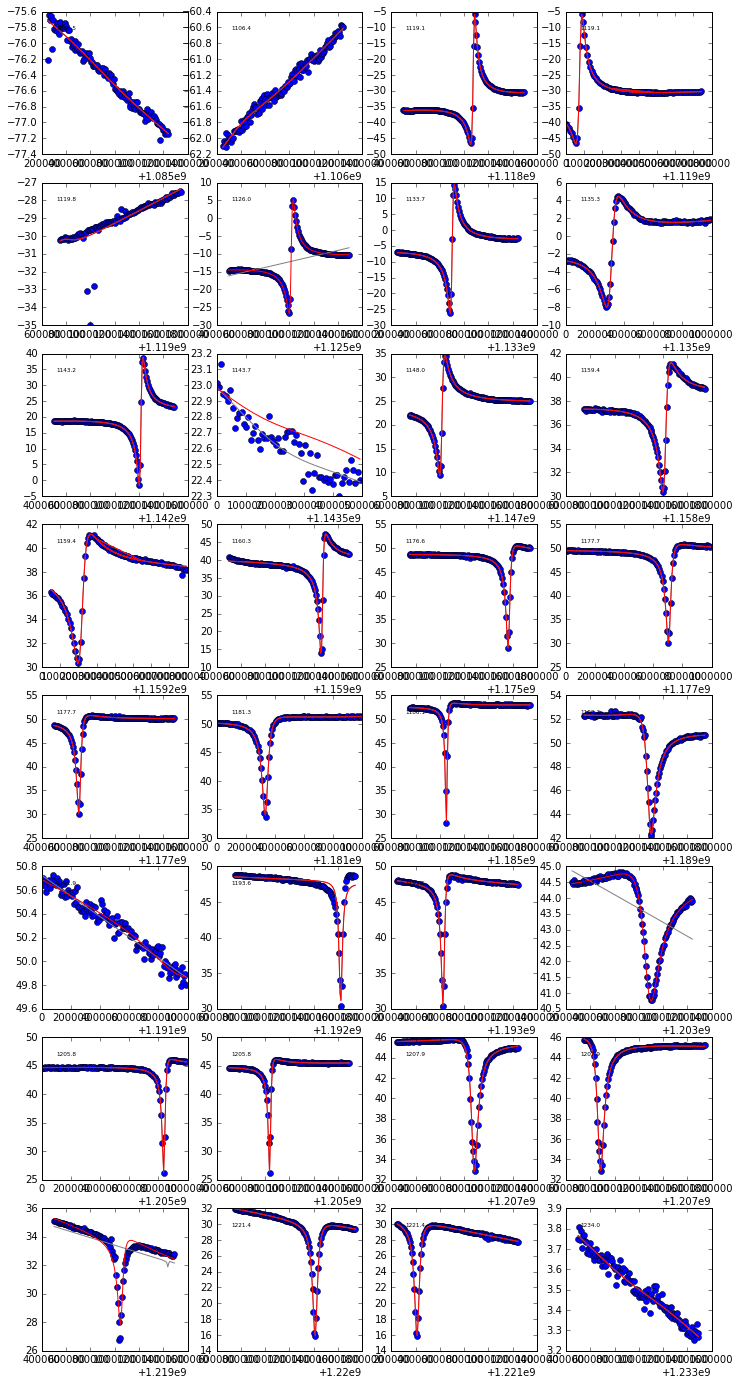

In [180]:
validated = []
fig,axs = subplots(8,4,figsize=(12,24))
axidx = 0
for swidx in range(32):
    swp = swa.sweep(swidx)
    for k in range(16):
        start = k*128/2
        stop = start+128
        res = lmfit_resonator.LinearResonatorWithCable(s21=swp.s21_points[start:stop],frequency=swp.frequency[start:stop],errors=swp.s21_points_error[start:stop])
        res.fit()
        res.fit()
        print res.f_0,res.Q,res.Q_e,res.Q_i,res.current_result.redchi,res.f_0-res.frequency.min(),validate_resonator(res)
        if validate_resonator(res):
            validated.append(res)
            if axidx < 32:
                ax=axs.flatten()[axidx]
                axidx += 1
                res.plot(ax=ax)
                ax.text(0.1,0.9,('%.1f' % (res.f_0/1e6)),ha='left',va='top',transform=ax.transAxes,size='xx-small')

In [181]:
len(validated)

32

In [185]:
res.f_0

1234011047.0542922

In [208]:
c = res.remove_background(res.frequency,res.s21)
d = res.model.right.eval(f=res.frequency,params=res.current_params)

In [196]:
res = validated[4]

In [234]:
res.Q/np.abs(res.Q_e)

0.0087307045698783951

In [236]:
import cPickle

In [241]:
cPickle.dumps(cable.current_params)

"clmfit.parameter\nParameters\np1\n(tRp2\n(dp3\nS'unique_symbols'\np4\n(dp5\nS'infty'\np6\nFinf\nsS'None'\np7\nNsS'False'\np8\nI00\nsS'newaxis'\np9\nNsS'NAN'\np10\nFnan\nsS'nan'\np11\nFnan\nsS'phi'\np12\ncnumpy.core.multiarray\nscalar\np13\n(cnumpy\ndtype\np14\n(S'f8'\nI0\nI1\ntRp15\n(I3\nS'<'\nNNNI-1\nI-1\nI0\ntbS'\\xaf4\\xdaPg\\xa0\\x00\\xc0'\ntRp16\nsS'f_min'\np17\ng13\n(g15\nS'\\x00\\x00\\x00\\xdc\\x81\\xaf\\xd0A'\ntRp18\nsS'little_endian'\np19\nI01\nsS'delay'\np20\ng13\n(g15\nS'\\xc4\\xe32\\xa6\\xa4\\xa2D\\xbe'\ntRp21\nsS'True'\np22\nI01\nsS'A_slope'\np23\ng13\n(g15\nS't_\\xe5\\\\g\\xcaA>'\ntRp24\nsS'e'\nF2.7182818284590451\nsS'Inf'\np25\nFinf\nsS'pi'\np26\nF3.1415926535897931\nsS'A_mag'\np27\ng13\n(g15\nS'*(n\\xbf\\xa0zO@'\ntRp28\nsS'inf'\np29\nFinf\nssS'params'\np30\n(lp31\nccopy_reg\n_reconstructor\np32\n(clmfit.parameter\nParameter\np33\nc__builtin__\nobject\np34\nNtRp35\n(g20\ng13\n(g15\nS'\\xc4\\xe32\\xa6\\xa4\\xa2D\\xbe'\ntRp36\nI01\nNF-inf\nFinf\nNNNtbag32\n(g33\ng34\nNtRp

In [235]:
[res.Q/np.abs(res.Q_e) for res in validated]

[0.0018072204497892568,
 0.0024394239890706466,
 0.65531929763769337,
 0.65621598873033449,
 0.0087307045698783951,
 0.4815585333509465,
 0.60490957227841058,
 0.18433781870372212,
 0.64003554357718895,
 0.0024833820493567475,
 0.41630659627753003,
 0.20969790680240727,
 0.21067153784390852,
 0.66042331777718633,
 0.43107493710765621,
 0.41274638055194135,
 0.41268569675351913,
 0.33964283934192269,
 0.48067446871330644,
 0.19366864406632206,
 0.0040335638688509846,
 0.35934295195276234,
 0.38498429173922549,
 0.091984579419889051,
 0.4352023327377586,
 0.43516107020401623,
 0.28469748463643707,
 0.28444707009751546,
 0.16311951264078953,
 0.40928437521835326,
 0.40902935633255588,
 0.0051472588554475037]

In [205]:
res.current_params

Parameters([('delay',
             <Parameter 'delay', -1.0698872743234217e-08, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', -2.0834284587751153, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=1119750000.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 62.769042099745548, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', 1.0309023459923376e-08, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 1119784211.9585519, bounds=[1119750000.0:1120742187.5]>),
            ('Q',
             <Parameter 'Q', 5172.2827571225034, bounds=[112.85748031496064:143329.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 23494.027604641869, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', 591958.39940287732, bounds=[-10000000.0:10000000.0]>)])

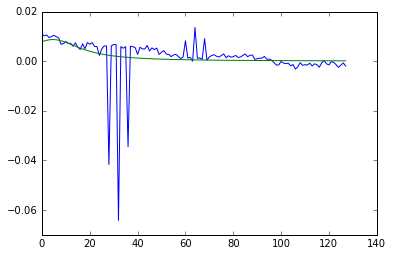

In [211]:
plot(np.angle(c))
plot(np.angle(d))

In [216]:
reload(lmfit_resonator)

<module 'kid_readout.analysis.resonator.lmfit_resonator' from '/home/gjones/kid_readout/kid_readout/analysis/resonator/lmfit_resonator.py'>

In [224]:
def invert(x):
    return 1/x.real + 1j/x.imag

In [225]:
cable = lmfit_resonator.GeneralCable(frequency=res.frequency,s21=res.s21,errors=invert(res.current_result.weights))

In [226]:
cable.fit()

In [227]:
cable.current_result.redchi

110.16450807268546

In [229]:
res.current_result.redchii

108.10328597418979

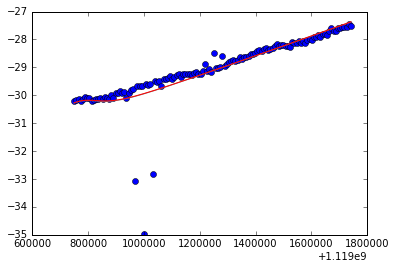

In [230]:
res.plot()

In [184]:
([res.f_0 for res in validated])

[1085488796.4618318,
 1106353221.2484624,
 1119076735.11289,
 1119076717.7935195,
 1119784211.9585519,
 1126015398.198585,
 1133701317.5345082,
 1135312454.2650974,
 1143215767.4124353,
 1143687397.8256347,
 1148016973.799206,
 1159417868.8361831,
 1159416951.8715892,
 1160269437.7477782,
 1176567473.5708663,
 1177708486.0842164,
 1177708468.7942176,
 1181337287.9875221,
 1186054723.6261411,
 1190291087.1826861,
 1191924527.9672458,
 1193621809.7112072,
 1193629832.1630526,
 1203877559.1709146,
 1205839222.8962412,
 1205839227.0452669,
 1207880461.7824178,
 1207880897.535598,
 1220052862.5490806,
 1221413713.4891291,
 1221413875.3298366,
 1234011047.0542922]

In [158]:
fg = res.remove_background(res.frequency,res.s21)

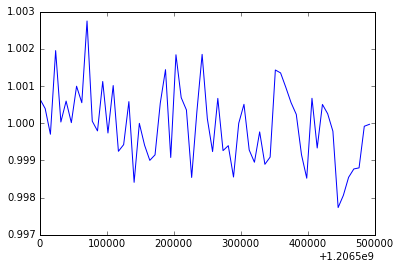

In [160]:
plot(res.frequency,np.abs(fg))

In [151]:
res.guess??

In [32]:
swp.s21_points

array([ 31.92831612-18.34583473j,  31.87333679-18.35689163j,
        31.88396835-18.42514038j, ...,  11.22218990-15.02298164j,
        11.22487259-14.97048378j,  11.22811127-14.94975853j], dtype=complex64)

In [34]:
import kid_readout.analysis.resonator.lmfit_models

In [102]:
reload(kid_readout.analysis.resonator.lmfit_models)

<module 'kid_readout.analysis.resonator.lmfit_models' from '/home/gjones/kid_readout/kid_readout/analysis/resonator/lmfit_models.pyc'>

In [103]:
reload(lmfit_resonator)

<module 'kid_readout.analysis.resonator.lmfit_resonator' from '/home/gjones/kid_readout/kid_readout/analysis/resonator/lmfit_resonator.py'>

In [104]:
res = lmfit_resonator.LinearResonatorWithCable(s21=swp.s21_points[:100],frequency=swp.frequency[:100],errors=swp.s21_points_error[:100])

In [105]:
res.fit(method='powell')

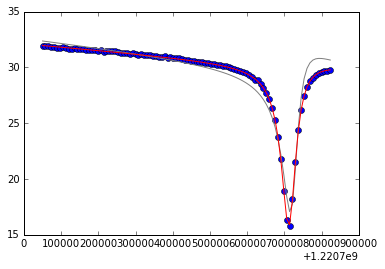

In [106]:
res.plot()

In [107]:
res.current_params

Parameters([('delay',
             <Parameter 'delay', 1.1017070849348952e-08, bounds=[-inf:inf]>),
            ('phi',
             <Parameter 'phi', -0.50938915508046856, bounds=[-3.141592653589793:3.141592653589793]>),
            ('f_min',
             <Parameter 'f_min', value=1220750000.0 (fixed), bounds=[-inf:inf]>),
            ('A_mag', <Parameter 'A_mag', 36.706409114479811, bounds=[0:inf]>),
            ('A_slope',
             <Parameter 'A_slope', -4.9083211032721096e-08, bounds=[-inf:inf]>),
            ('f_0',
             <Parameter 'f_0', 1221413754.649147, bounds=[1220750000.0:1221523437.5]>),
            ('Q',
             <Parameter 'Q', 25947.716604239329, bounds=[157.92121212121214:156342.0]>),
            ('Q_e_real',
             <Parameter 'Q_e_real', 58926.05891264166, bounds=[1:10000000.0]>),
            ('Q_e_imag',
             <Parameter 'Q_e_imag', -23388.595553489402, bounds=[-10000000.0:10000000.0]>)])

In [108]:
print res.current_result.fit_report()

[[Model]]
    (Model(general_cable) * Model(linear_resonator))
[[Fit Statistics]]
    # function evals   = 1274
    # data points      = 200
    # variables        = 8
    chi-square         = 345.794
    reduced chi-square = 1.801
    Akaike info crit   = 133.670
    Bayesian info crit = 160.056
[[Variables]]
    delay:      1.1017e-08 (init= 1.994318e-08)
    phi:       -0.50938915 (init=-0.4974547)
    f_min:      1.22075e+09 (fixed)
    A_mag:      36.7064091 (init= 37.13241)
    A_slope:   -4.9083e-08 (init=-5.268446e-08)
    f_0:        1.2214e+09 (init= 1.221423e+09)
    Q:          25947.7166 (init= 25370.85)
    Q_e_real:   58926.0589 (init= 64434.28)
    Q_e_imag:  -23388.5955 (init= 0.08893152)
[[Correlations]] (unreported correlations are <  0.100)



In [109]:

res.Q_i

41879.054542790967

In [242]:
import joblib

In [247]:
import itertools

In [249]:
len(list(itertools.chain.from_iterable(joblib.load('/home/gjones/resonators_1010_test.pkl'))))

26